In [3]:
#まず、データをdownloadします　
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2021-06-12 06:33:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
archive.ics.uci.edu (archive.ics.uci.edu) をDNSに問いあわせています... 128.195.10.252
archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 84199 (82K) [application/x-httpd-php]
`winequality-red.csv' に保存中

winequality-red.csv 100%[===================>]  82.23K   330KB/s 時間 0.2s       

2021-06-12 06:33:06 (330 KB/s) - `winequality-red.csv' へ保存完了 [84199/84199]



In [5]:
#wineデータを対象に、最急降下法（最急降下法のアルゴリズムの1つ）を行います。
#ステップサイズはeta=0.03, 0.01, 0.003の三種類を設定し、 横軸に更新回数、縦軸にそのときの目的関数値(二乗誤差)をプロットします
#ログには終了までの更新回数と終了時の誤差を表示します

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import io


# データを読み込む
wine = pd.read_csv('winequality-red.csv', header=0,  sep=";")
featureName=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates', 'alcohol']
objectiveName=['quality']

# 学習データを作る
sc = StandardScaler()
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values
X = sc.fit_transform(X)
X = np.insert(X, 0, 1, axis=1)
y = wine['quality'].values

# 訓練用のデータを作る
X_train = X[:math.floor(len(y) * 0.8)]
y_train = y[:math.floor(len(y) * 0.8)]
m = len(y_train)            # 学習データの個数

η = 0.03, iter = 688, loss = 0.4161987615416984
η = 0.01, iter = 2130, loss = 0.41660640191014214
η = 0.003, iter = 4276, loss = 0.4182987618766864


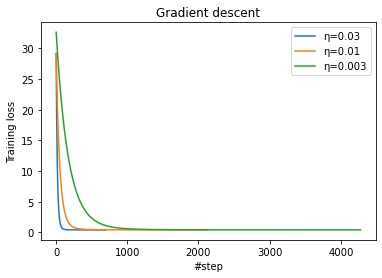

In [7]:
# 各種パラメータ
alpha = 0.01                # 正則化パラメタ
n_update = 10000            # 更新のステップ数
etas = [0.03, 0.01, 0.003]  # ステップサイズ
conv_condition = 1e-6       # 収束の判定としてに使う改善の幅
np.random.seed(seed=0)

plt.figure()
for eta in etas:
    loss_history = [] 
    w = np.random.rand(len(X_train[0]),)        # initialize parameter
    for i in range(n_update):
        pred = np.dot(X_train, w)
        error = pred - y_train
        w_pre = w
        w = w - (1/m)*eta*((X_train.T.dot(error)) + alpha * 2 * w)  # parameter update
    
        loss = mean_squared_error(y_train, np.dot(X_train,w)) + alpha/m*np.dot(w,w)        # calculate loss
        loss_history.append(loss)

        # 収束判定
        if len(loss_history) > 1 and loss_history[-2] - loss_history[-1] < conv_condition:
            print(f"η = {eta}, iter = {i}, loss = {loss_history[-1]}")
            break

    plt.plot(range(1, i+2), loss_history, label="η=" + str(eta))

plt.xlabel("#step")
plt.ylabel("Training loss")
plt.title("Gradient descent")
plt.legend()

plt.show()

η = 0.03, #step = 306, loss = 0.6714875883615022
η = 0.01, #step = 555, loss = 0.6773102644038352
η = 0.003, #step = 1352, loss = 0.5313152369327471


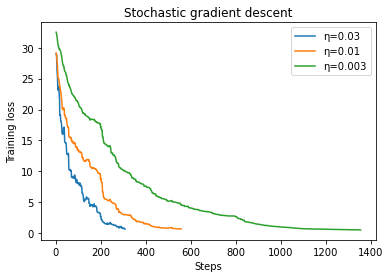

In [8]:
#wineデータを対象に、確率的勾配降下法を行います。
#ステップサイズはeta=0.03, 0.01, 0.003の三種類を設定し、 横軸に更新回数、縦軸にそのときの目的関数値(二乗誤差)をプロットします
#ログには終了までの更新回数と終了時の誤差を表示します
# 各種パラメータ
alpha = 0.01                # 正則化パラメタ
n_update = 10000            # 更新のステップ数
etas = [0.03, 0.01, 0.003]  # ステップサイズ
conv_condition = 20         # 収束の条件として使うステップ数
np.random.seed(seed=0)

plt.figure()
for eta in etas:
    step = 0
    loss_hist = []
    w = np.random.rand(len(X_train[0]),) # パラメータの初期化
    _min = np.inf
    conv_cnt = 0 
    for i in range(n_update):
        pred = np.dot(X_train[i%m], w)
        error = pred - y_train[i%m]
        w = w - eta*(error*X_train[i%m] + alpha/m * 2 * w)   # 更新

        loss = mean_squared_error(y_train, 
                                  np.dot(X_train,w)) + alpha/m*np.dot(w,w)
        loss_hist.append(loss)
        step = i

        # 収束判定
        if _min < loss:
            if conv_cnt == conv_condition:
                print(f"η = {eta}, #step = {i - conv_condition}, loss = {_min}")
                break
            else:
                conv_cnt += 1
        else:
            _min = loss
            conv_cnt = 0

    plt.plot(range(1, step-conv_condition+2), 
           loss_hist[:-conv_condition], 
           label= f"η={eta}")

plt.xlabel("Steps")
plt.ylabel("Training loss")
plt.title("Stochastic gradient descent")
plt.legend()

plt.show()